### Initial Setup and Imports

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

## Plotting HPS Analysis Histograms
Histograms produced by using `hpstr` to analyze ntuples decoded from lcio files.

### Dependencies
- uproot
- matplotlib
- numpy
- hist[plot]

In [2]:
from uphpstr import hpstrHistFile
f = hpstrHistFile('../2016-subsample/hist_2016_subsample_run_007800_part_0000_0387.root','tpt',
                  ['pre_fiducial_cut',
                   'pos_tag','pos_tag_E','pos_tag_E_time',
                   'el0_tag','el0_tag_E','el0_tag_E_time',
                   'el1_tag','el1_tag_E','el1_tag_E_time'
                  ])

## Selection Cuts
We are trying to develop a series of cuts that allows us to select Three Prong Trident (TPT) events.
These events have historically been helpful for studying the tracking efficiency, so we also want
to keep that in mind when selecting cuts and avoid using the tracks themselves until the last moment.

In `ThreeProngTridentTracksAnalyzer`, I have implemented two different selections "cluster" and "event" selections.

### Cluster Cuts

FEE = Full Energy Electrons

Cut | Description | Reason
----|-------------|--------
E < 2GeV | Energy less than 87% of the beam energy | Don't want events where a FEE happens to also have two mini clusters
E > 0.1GeV | Energy greater than 100MeV | Want clusters that are substantial
e- | clusters with x < 0mm | Sort clusters into electron candidates by bend in magnetic field
e+ | clusters with x > 100mm | sort clusters into positron candidates by bend in magnetic field

After performing the cluster cuts, we can move onto the event cuts which rely on already chosen positron and electron candidate clusters.

### Event Cuts
The three "trident clusters" are chose after making sure there are enough positron/electrons.
The highest energy positron cluster and the two highest energy electron clusters are the three trident clusters.

Cut | Description | Reason
----|-------------|--------
\>= 1 positron | at least one positron candidate cluster | tridents produce a positron
\>= 2 electrons | at least two electron candidate clusters | tridents produce two electrons
\<= 1 positron | maximum of one positron candidate |
\<= 2 electrons | maximum of two electron candidates |
fiducial | none of the trident clusters have seeds on the edge | make sure clusters have a good estimate of the energy
within 2ns | maximum time difference between any two of the trident clusters is 2ns | tridents happen in-time so the clusters should be close to the same time

These last two cuts have the biggest effect on the sample, so we have histograms filled in between them.

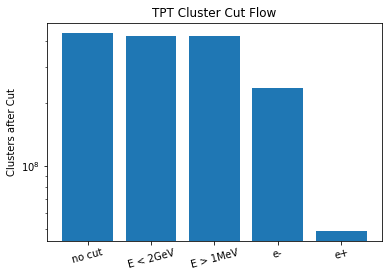

In [3]:
plt.bar(['no cut', 'E < 2GeV', 'E > 1MeV', 'e-', 'e+'],
        f.get('cluster_selection_cutflow',include_prefix=False).values())
plt.xticks(rotation = 15)
plt.yscale('log')
plt.ylabel('Clusters after Cut')
plt.title('TPT Cluster Cut Flow')
plt.show()

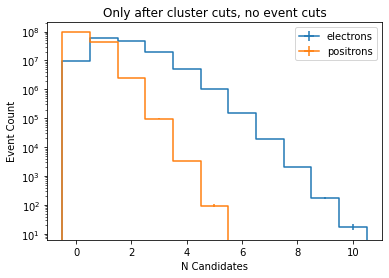

In [4]:
f.plot_1d({'electrons' : 'n_electron_candidates',
           'positrons' : 'n_positron_candidates'},
          'N Candidates', title = 'Only after cluster cuts, no event cuts')

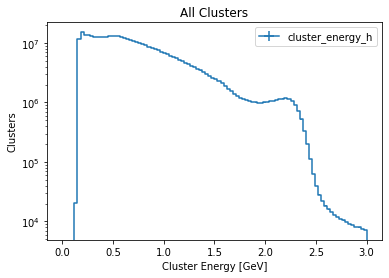

In [5]:
f.plot_1d('cluster_energy','Cluster Energy [GeV]', ylabel='Clusters', title='All Clusters')

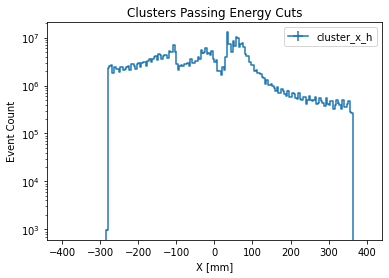

In [6]:
f.plot_1d('cluster_x','X [mm]',title='Clusters Passing Energy Cuts')

## Cluster Variables
During the last two cuts, we want to study how the cluster variables evolve. Below, we have various cluster variables and meta-variables plotted.

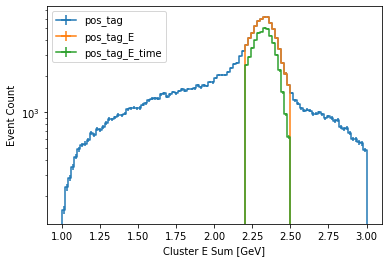

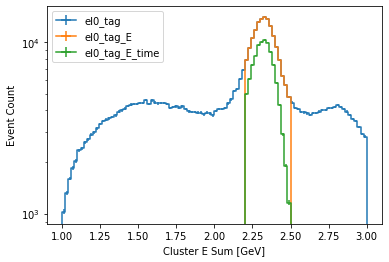

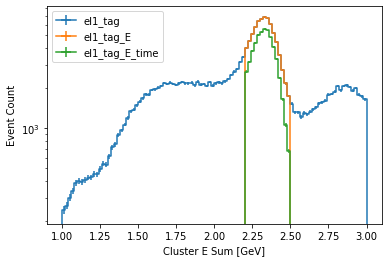

In [8]:
for p in ['pos','el0','el1'] :
    f.plot_1d('cluster_E_sum','Cluster E Sum [GeV]',
              selections=lambda copies : [c for c in copies if p in c])

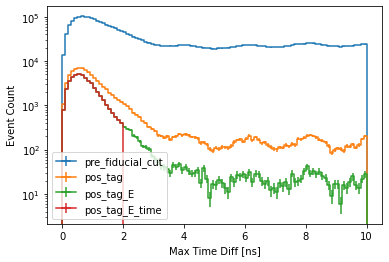

In [21]:
f.plot_1d('max_time_diff','Max Time Diff [ns]', selections=slice(0,4,1))

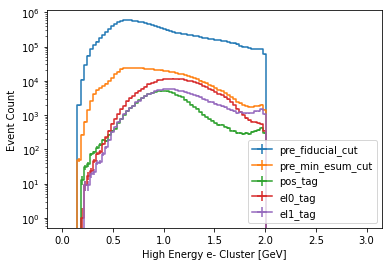

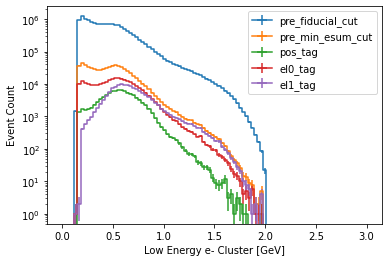

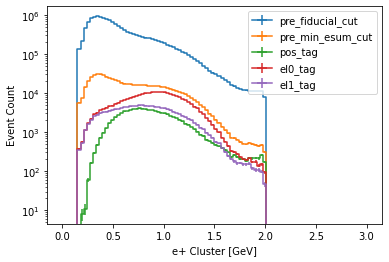

In [83]:
f.plot_1d('electron0_cluster_E', 'High Energy e- Cluster [GeV]',selections=True)
f.plot_1d('electron1_cluster_E', 'Low Energy e- Cluster [GeV]',selections=True)
f.plot_1d('positron_cluster_E', 'e+ Cluster [GeV]',selections=True)

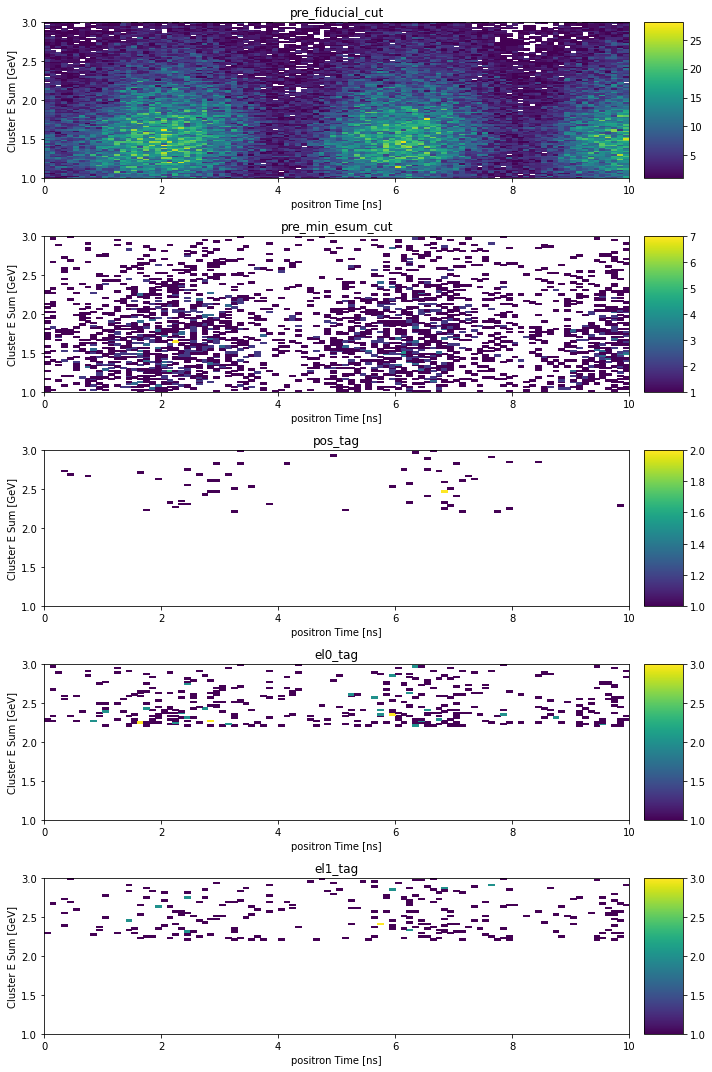

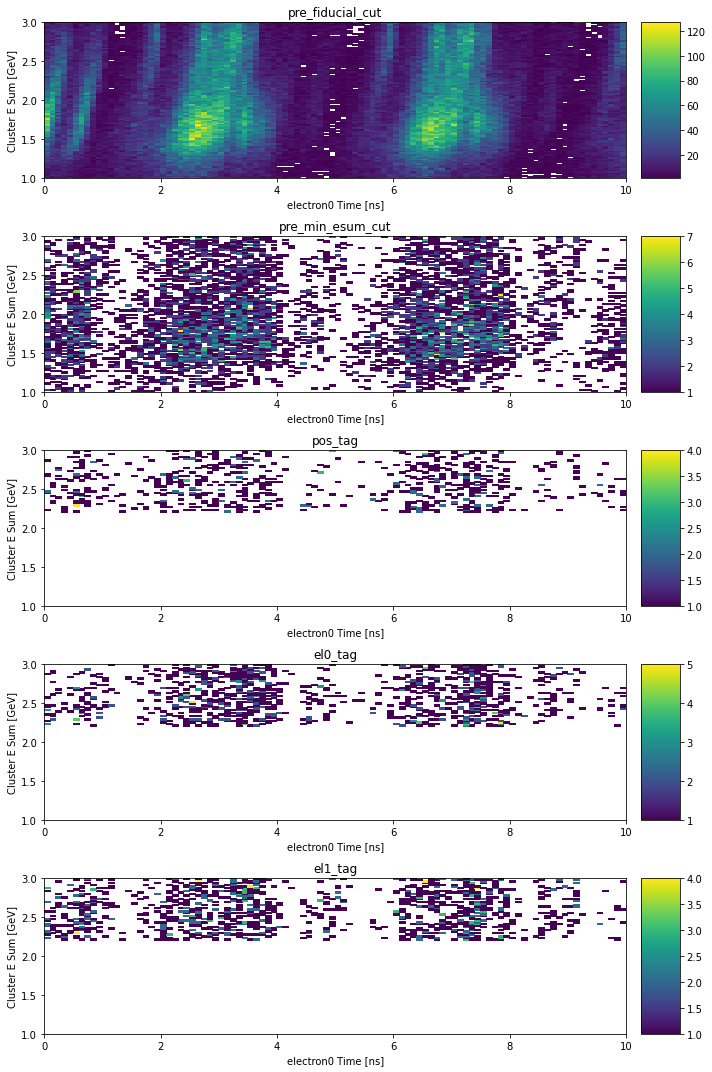

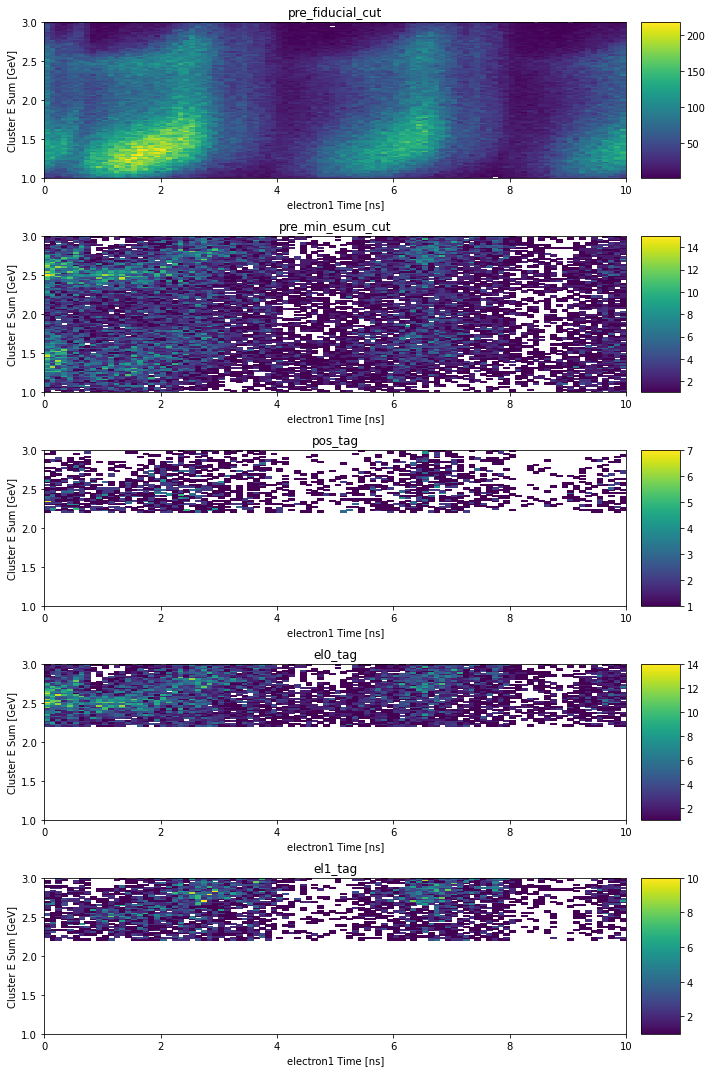

In [90]:
f.plot_2d('pos_time_cluster_E_sum','positron Time [ns]', 'Cluster E Sum [GeV]', selections=True, size=(10,15))
f.plot_2d('el0_time_cluster_E_sum','electron0 Time [ns]', 'Cluster E Sum [GeV]', selections=True, size=(10,15))
f.plot_2d('el1_time_cluster_E_sum','electron1 Time [ns]', 'Cluster E Sum [GeV]', selections=True, size=(10,15))

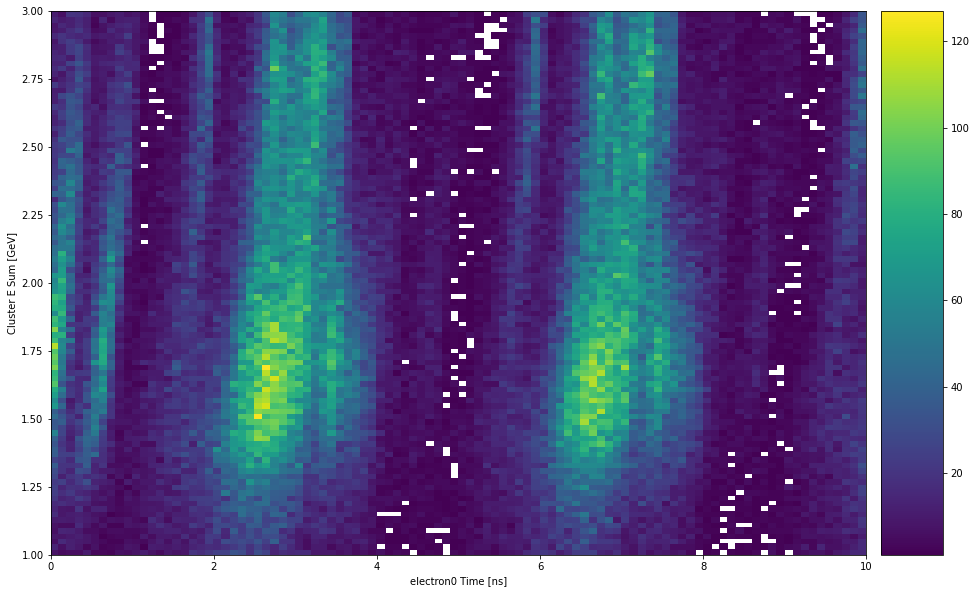

In [95]:
f.plot_2d('pre_fiducial_cut_follow_el0_time_cluster_E_sum_hh','electron0 Time [ns]', 'Cluster E Sum [GeV]', size=(16,10))

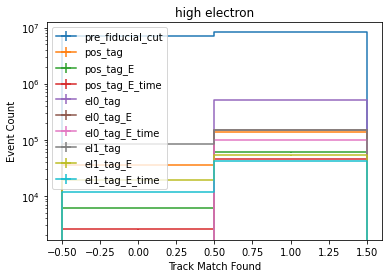

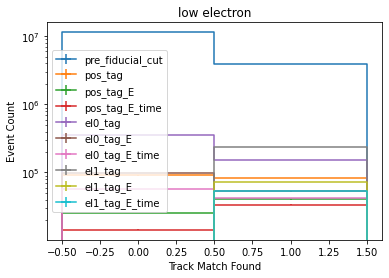

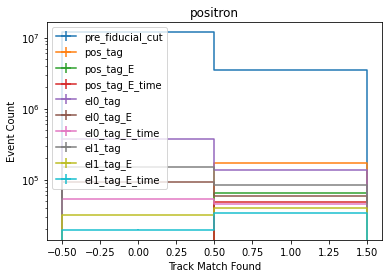

In [20]:
f.plot_1d('electron0_track_N','Track Match Found',title='high electron',selections=True)
f.plot_1d('electron1_track_N','Track Match Found',title='low electron',selections=True)
f.plot_1d('positron_track_N','Track Match Found',title='positron',selections=True)

## Track Parameters
Below are a pile of track parameter plots filled for events that pass the requirements listed below.
- All clusters are fiducial (i.e. no cluster's seed is on the edge of the ecal)
- The cluster E sum is above the minimum cut (~2GeV)

There is additional complication in that these plots are only (and can only) be filled when a track is found for the given candidate cluster. The tracks are the ones that are matched to the cluster of the corresponding name.

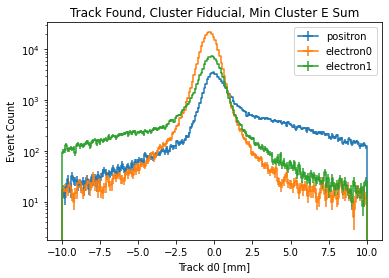

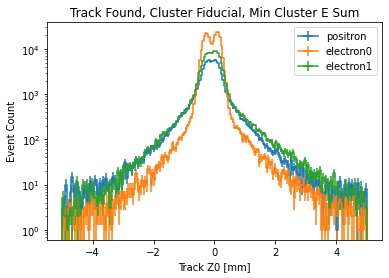

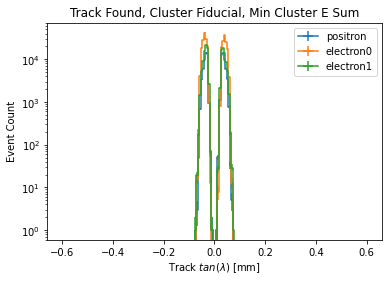

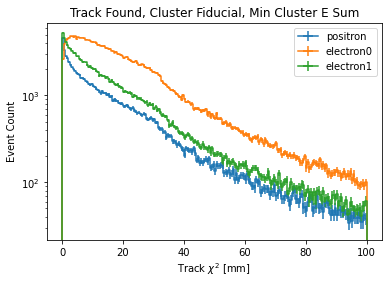

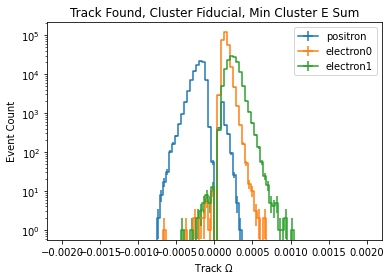

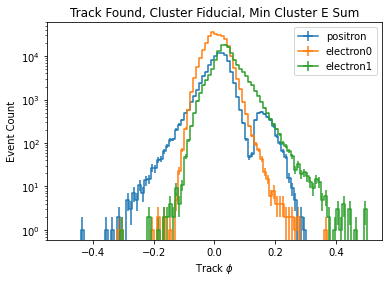

In [86]:
f.plot_1d({p : f'{p}_d0_h' for p in ['positron','electron0','electron1']},
          'Track d0 [mm]', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')
f.plot_1d({p : f'{p}_Z0_h' for p in ['positron','electron0','electron1']},
          'Track Z0 [mm]', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')
f.plot_1d({p : f'{p}_TanLambda_h' for p in ['positron','electron0','electron1']},
          'Track $tan(\lambda)$ [mm]', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')
f.plot_1d({p : f'{p}_chi2_h' for p in ['positron','electron0','electron1']},
          'Track $\chi^2$ [mm]', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')
f.plot_1d({p : f'{p}_Omega_h' for p in ['positron','electron0','electron1']},
          'Track $\Omega$', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')
f.plot_1d({p : f'{p}_Phi_h' for p in ['positron','electron0','electron1']},
          'Track $\phi$', title = 'Track Found, Cluster Fiducial, Min Cluster E Sum')